<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libary" data-toc-modified-id="Libary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libary</a></span></li><li><span><a href="#Linear-SVM" data-toc-modified-id="Linear-SVM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear SVM</a></span><ul class="toc-item"><li><span><a href="#Explore" data-toc-modified-id="Explore-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explore</a></span></li><li><span><a href="#Linear-Kernel-Model" data-toc-modified-id="Linear-Kernel-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Kernel Model</a></span><ul class="toc-item"><li><span><a href="#pipeline-and-modeling" data-toc-modified-id="pipeline-and-modeling-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>pipeline and modeling</a></span></li><li><span><a href="#plot" data-toc-modified-id="plot-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>plot</a></span></li></ul></li></ul></li><li><span><a href="#Non-Linear-SVM" data-toc-modified-id="Non-Linear-SVM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Non-Linear SVM</a></span></li></ul></div>

# Libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit#用于支持带交叉验证的网格搜索
from sklearn.model_selection import GridSearchCV#带交叉验证的网格搜索




from sklearn.svm import SVC

from time import time
import datetime

# Linear SVM

<font color='red'>Assignment:</font> Load the data in "../data/svm.csv" into a DataFrame.

In [2]:
df = pd.read_csv('svm.csv')
df.head()

,x1,x2,y
0,0.800295,0.074122,1
1,2.080688,1.987278,0
2,0.981368,0.164505,1
3,2.094340,1.477435,0
4,1.686915,1.081737,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   y       200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [4]:
df.y[df.y==1].count()

50

In [5]:
df.y[df.y==0].count()

150

## Explore

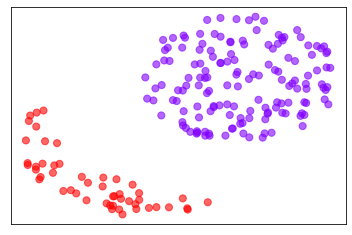

In [6]:
plt.scatter(df.x1, df.x2, c = df.y, cmap="rainbow", s =  50, alpha=0.6)
plt.xticks([])
plt.yticks([])
ax = plt.gca() 
plt.show()

## Linear Kernel Model

<font color='red'>Assignment:</font> Import **SVC** from sklearn, and train a SVM classifier using **Linear Kernel** to predict y with **x1** and **x2**. No need to hold out a test set this time.

In [7]:
df.head()

,x1,x2,y
0,0.800295,0.074122,1
1,2.080688,1.987278,0
2,0.981368,0.164505,1
3,2.094340,1.477435,0
4,1.686915,1.081737,0


### pipeline and modeling

In [8]:
X_raw = df[['x1','x2']]
y_raw = df['y']

steps = [#('rescale',StandardScaler())
        ('clf',SVC(kernel = 'linear'))]
pipe = Pipeline(steps)
clf_model = pipe.fit(X_raw,y_raw)

### plot

In [9]:
class svm_visualization(object):
    
    def __init__(self, model, data):
        self.model = model
        self.data = data
        xrange = df.x1.max() - df.x1.min()
        yrange = df.x2.max() - df.x2.min()
        self.xmin = df.x1.min() - 0.1 * xrange
        self.xmax = df.x1.max() + 0.1 * xrange
        self.ymin = df.x2.min() - 0.1 * yrange
        self.ymax = df.x2.max() + 0.1 * yrange
        #plt.figure()
        
    def show(self):
        self.plot_contour()
        self.plot_data()
        self.plot_sv()
        try:
            self.plot_boundry()
        except:
            print('Warning: No boundry is available!')
        plt.xlim(self.xmin, self.xmax)
        plt.ylim(self.ymin, self.ymax)

    def plot_data(self):
        df = self.data
        plt.scatter(df[df.y==0]['x1'], df[df.y==0]['x2'], alpha=0.5,label = 'class1')
        plt.scatter(df[df.y==1]['x1'], df[df.y==1]['x2'], alpha=0.5)
        return plt
    
    def plot_sv(self):
        indices = self.model[-1].support_
        svs = self.model[-1].support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], facecolors='none', edgecolors='r')
        return plt
    
    def plot_boundry(self):
        w = self.model.coef_[0]
        a = -w[0] / w[1]
        x = np.linspace(self.xmin, self.xmax)
        y = a * x - (self.model.intercept_[0]) / w[1]
        plt.plot(x, y, ls='--', c='k')
        return plt
    
    def plot_contour(self,ax=None):
        if ax is None:
            ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        
        x = np.linspace(self.xmin, self.xmax, 30)
        y = np.linspace(self.ymin, self.ymax, 30)
        Y, X = np.meshgrid(y, x)
        xy = np.vstack([X.ravel(), Y.ravel()]).T
        Z = self.model.decision_function(xy).reshape(X.shape)
        
        ax.contour(X, Y, Z,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"]) 
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        
        z_bound = 3*max(abs(Z.min()), abs(Z.max()))
        plt.contourf(X, Y, Z, 50, cmap='bwr', vmin=-z_bound, vmax=z_bound) #cmap=plt.cm.Paired
        plt.colorbar()
        return plt


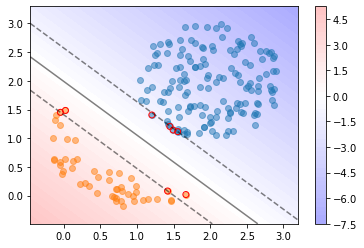

In [10]:
sv=svm_visualization(clf_model,df)
sv.show()

<font color='red'>Assignment:</font> Find out the **support vectors** and plot them together with data points.

See above

<font color='red'>Question:</font> What are support vectors?

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

<font color='red'>Question:</font> How many support vectors in this model? Where do they locate?

In [11]:
n_Support_vector = clf_model[-1].n_support_
n_Support_vector

array([4, 4], dtype=int32)

In [12]:
support_vector_number = len(clf_model[-1].support_vectors_)
print("Support_vector_number is {}".format(support_vector_number))

Support_vector_number is 8


In [13]:
clf_model[-1].support_vectors_

array([[ 1.55624094,  1.11479029],
       [ 1.20372171,  1.40495343],
       [ 1.49379259,  1.14332924],
       [ 1.44935822,  1.20500473],
       [ 1.66855686,  0.01866655],
       [ 1.41860816,  0.08048487],
       [ 0.02501113,  1.48362746],
       [-0.04344945,  1.45086578]])

<font color='red'>Assignment:</font> Change hyper parameter **C** and find out how the number and locations of support vectors are affected.

<font color='red'>Question:</font> When **C** is relatively small (e.g. 0.01), how many support vectors in positive and negative classes, respectively? Do you see any problem with that?.


The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

In [14]:
X_raw = df[['x1','x2']]
y_raw = df['y']

steps = [#('rescale',StandardScaler())
        ('clf',SVC(kernel = 'linear',C=0.01))]
pipe = Pipeline(steps)
clf_model = pipe.fit(X_raw,y_raw)

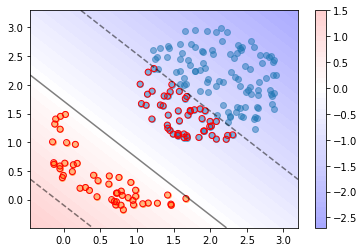

In [15]:
a=svm_visualization(clf_model,df)
a.show()

In [16]:
def number_of_vector(model):
    n_Support_vector = model[-1].n_support_
    n_Support_vector
    print("The number of support vectors is {},".format(n_Support_vector[0]+n_Support_vector[1]))
    print("The number of support vectors in positive class is {},".format(n_Support_vector[0]))
    print("The number of support vectors in negtive class is {}.".format(n_Support_vector[1]))


In [17]:
number_of_vector(clf_model)

The number of support vectors is 100,
The number of support vectors in positive class is 50,
The number of support vectors in negtive class is 50.


C= 0.01
The number of support vectors is 100,
The number of support vectors in positive class is 50,
The number of support vectors in negtive class is 50.
C= 0.5644444444444445
The number of support vectors is 11,
The number of support vectors in positive class is 5,
The number of support vectors in negtive class is 6.
C= 1.118888888888889
The number of support vectors is 7,
The number of support vectors in positive class is 3,
The number of support vectors in negtive class is 4.
C= 1.6733333333333336
The number of support vectors is 4,
The number of support vectors in positive class is 2,
The number of support vectors in negtive class is 2.
C= 2.227777777777778
The number of support vectors is 4,
The number of support vectors in positive class is 2,
The number of support vectors in negtive class is 2.
C= 2.7822222222222224
The number of support vectors is 4,
The number of support vectors in positive class is 2,
The number of support vectors in negtive class is 2.
C= 3.336666666666667


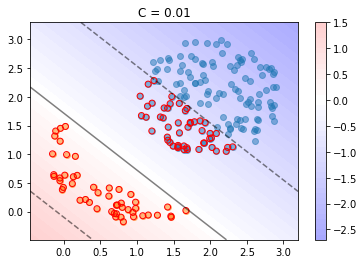

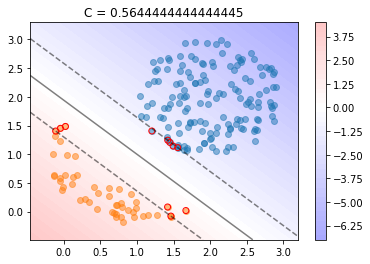

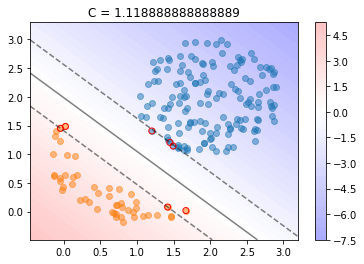

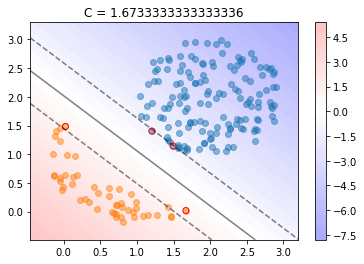

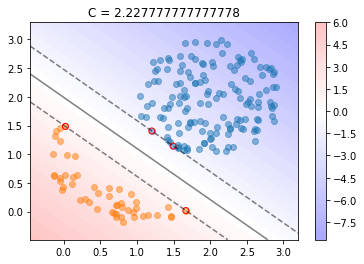

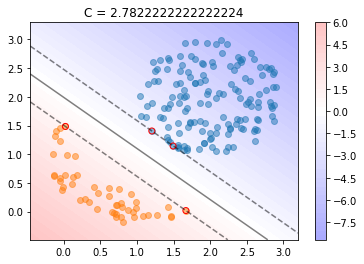

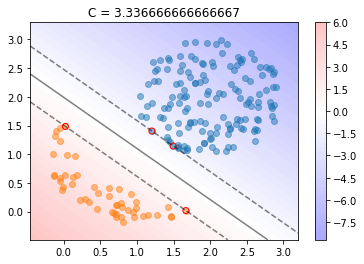

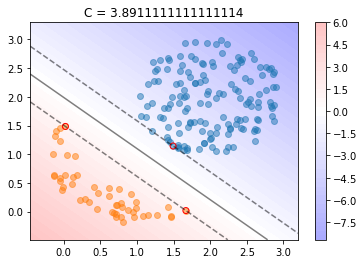

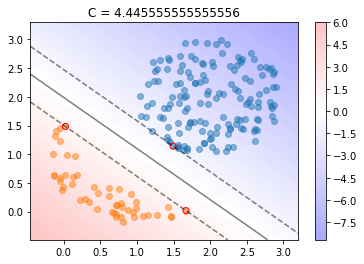

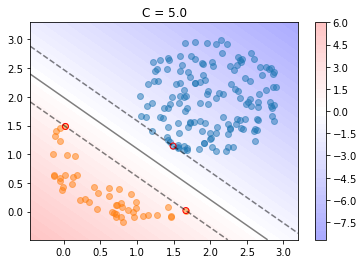

In [18]:
X_raw = df[['x1','x2']]
y_raw = df['y']

C_range = np.linspace(0.01,5,10) 

for i, c in enumerate(C_range):
    steps = [#('rescale',StandardScaler())
            ('clf',SVC(kernel = 'linear',C=c))]
    pipe = Pipeline(steps)
    clf_model = pipe.fit(X_raw,y_raw)
    
    plt.figure() # !!!need creat a figure every time!!!
    
    print('C=',c)
    nv=number_of_vector(clf_model)
    #print("The accuracy under linear is{}".format(clf_model.score(X_raw,Ytest)))
    
    title = 'C = {}'.format(c)
    plt.title(title)
    
    sv = svm_visualization(clf_model,df)
    sv.show()
   
    
    

<font color='red'>Assignment:</font> Balance the classes (using **class_weight**), re-train the model, and find out the change of support vector numbers in positive and negative classes.

The number of support vectors is 5,
The number of support vectors in positive class is 3,
The number of support vectors in negtive class is 2.


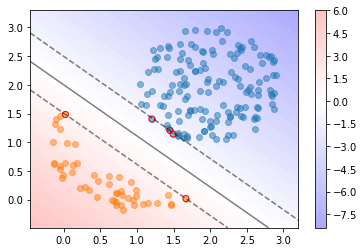

In [19]:
X_raw = df[['x1','x2']]
y_raw = df['y']

steps = [#('rescale',StandardScaler())
        ('clf',SVC(kernel = 'linear',C=2.5, class_weight = 'balanced'))]
pipe = Pipeline(steps)
clf_model = pipe.fit(X_raw,y_raw)


sv = svm_visualization(clf_model,df)
sv.show()

number_of_vector(clf_model)


<font color='red'>Question:</font> Is SVM sensitive to base rate? Why?


No. Base rate dose not affact the hyperplane.

<font color='red'>Question:</font> What is a hyperplane?

A hyperplane is a decision boundary that differentiates the two classes in SVM.

<font color='red'>Question:</font> What is the optimal hyperplane for a SVM model?

The hyperplane for which the margin is maximum is the optimal hyperplane. Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible

<font color='red'>Question:</font> What is the difference between hard margin and soft margin? Which margin was adopted in the above model?

The difference between a hard margin and a soft margin in SVMs lies in the separability of the data. If our data is linearly separable, we go for a hard margin. However, if this is not the case, it won’t be feasible to do that. In the presence of the data points that make it impossible to find a linear classifier, we would have to be more lenient and let some of the data points be misclassified. In this case, a soft margin SVM is appropriate.

In the above model, hard margin was adopted.

<font color='red'>Question:</font> What is hinge loss?

https://programmathically.com/understanding-hinge-loss-and-the-svm-cost-function/#:~:text=to%20less%20regularization.-,Summary,soft%20margin%20support%20vector%20machines.

The hinge loss is a special type of cost function that not only penalizes misclassified samples but also correctly classified ones that are within a defined margin from the decision boundary. The hinge loss function is most commonly employed to regularize soft margin support vector machines. The degree of regularization determines how aggressively the classifier tries to prevent misclassifications and can be controlled with an additional parameter C. Hard margin SVMs do not allow for misclassifications and do not require regularization.



<font color='red'>Question:</font> What is the difference between SVM and Logistic Regression? What are the pros and cons of these two algorithm?

https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16#:~:text=Difference%20between%20SVM%20and%20Logistic%20Regression&text=SVM%20works%20well%20with%20unstructured,is%20based%20on%20statistical%20approaches.


https://www.geeksforgeeks.org/differentiate-between-support-vector-machine-and-logistic-regression/

Logistic Regression:

It is a classification model which is used to predict the odds in favour of a particular event. The odds ratio represents the positive event which we want to predict, for example, how likely a sample has breast cancer/ how likely is it for an individual to become diabetic in future. It used the sigmoid function to convert an input value between 0 and 1.
The basic idea of logistic regression is to adapt linear regression so that it estimates the probability a new entry falls in a class. The linear decision boundary is simply a consequence of the structure of the regression function and the use of a threshold in the function to classify. Logistic Regression tries to maximize the conditional likelihood of the training data, it is highly prone to outliers. Standardization (as co-linearity checks) is also fundamental to make sure a features’ weights do not dominate over the others.

Support Vector Machine (SVM):

It is a very powerful classification algorithm to maximize the margin among class variables. This margin (support vector) represents the distance between the separating hyperplanes (decision boundary). The reason to have decision boundaries with large margin is to separate positive and negative hyperplanes with adjustable bias-variance proportion. The goal is to separate so that negative samples would fall under negative hyperplane and positive samples would fall under positive hyperplane. SVM is not as prone to outliers as it only cares about the points closest to the decision boundary. It changes its decision boundary depending on the placement of the new positive or negative events.
The decision boundary is much more important for Linear SVM’s – the whole goal is to place a linear boundary in a smart way. There isn’t a probabilistic interpretation of individual classifications, at least not in the original formulation.


Hence, key points are:

SVM try to maximize the margin between the closest support vectors whereas logistic regression maximize the posterior class probability
SVM is deterministic (but we can use Platts model for probability score) while LR is probabilistic.
For the kernel space, SVM is faster

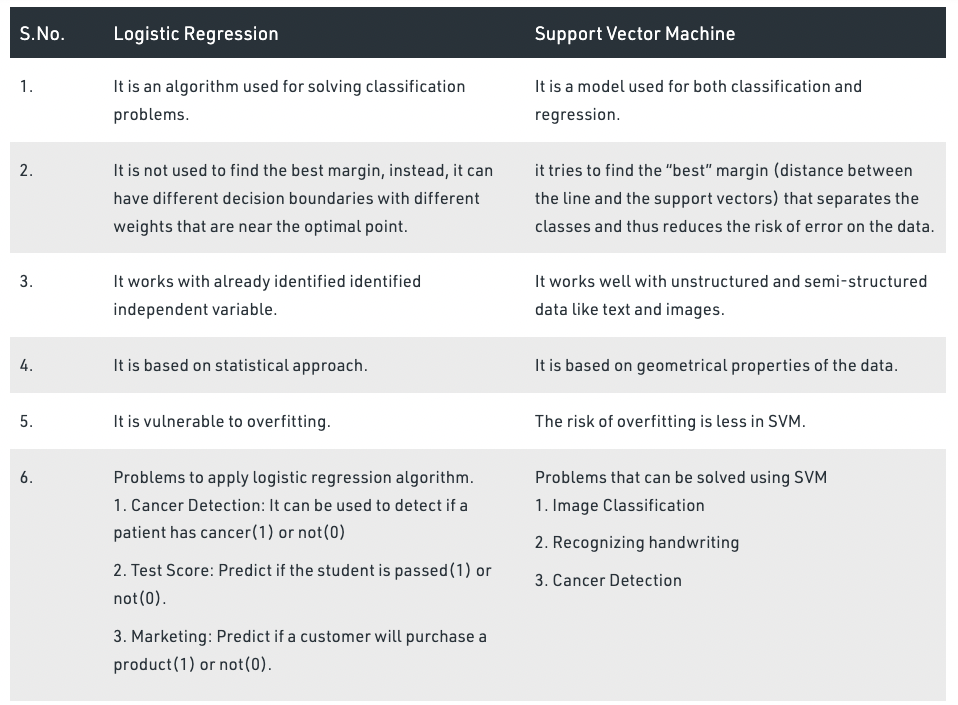

<font color='red'>Question:</font> Given a data set with many columns and a relatively small amount of rows, which algorithm could be better? SVM or Logistic Regression?

Logistic regression come from linear regression. Linear regression require labels are normal distributed, and no/less multicoliearity in features. Logistic Regression is very good at linear relation but may not good at some.

Many columns means many features, maybe it is not easy to use logistic regression. SVM will be better in this situation.

# Non-Linear SVM

**Example:** SVM visualization class

**Example:** Visualize linear SVM model. The dash line (only appears in linear models) indicates the decision boundry, and the contour indicates how confidently the prediction of a class.

The number of support vectors is 4,
The number of support vectors in positive class is 2,
The number of support vectors in negtive class is 2.


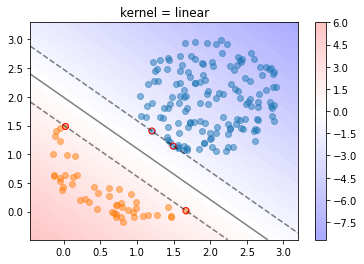

In [20]:
X_raw = df[['x1','x2']]
y_raw = df['y']

steps = [#('rescale',StandardScaler())
        ('clf',SVC(kernel = 'linear',C=2))]
pipe = Pipeline(steps)
clf_model = pipe.fit(X_raw,y_raw)

plt.figure() # !!!need creat a figure every time!!!


nv=number_of_vector(clf_model)

plt.title('kernel = linear')

sv = svm_visualization(clf_model,df)
sv.show()

The accuracy under kernel linear is 1.000000
Time cost is 0.04390311241149902
The accuracy under kernel poly is 1.000000
Time cost is 0.042910099029541016
The accuracy under kernel rbf is 1.000000
Time cost is 0.043190956115722656
The accuracy under kernel sigmoid is 0.520000
Time cost is 0.04833388328552246


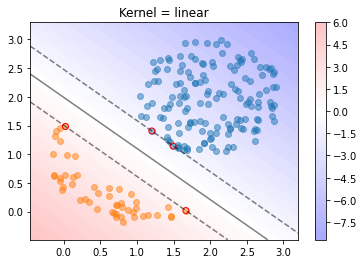

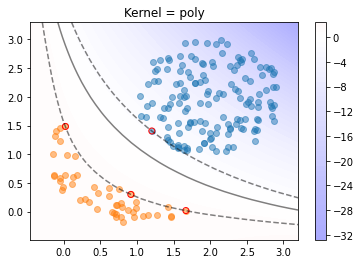

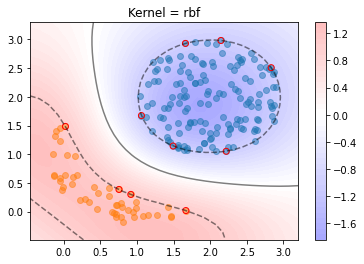

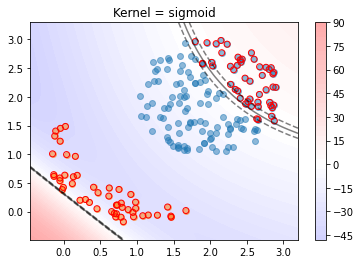

In [21]:
from time import time
import datetime

X_raw = df[['x1','x2']]
y_raw = df['y']


Kernel = ["linear","poly","rbf","sigmoid"]
for K in Kernel:
    time0 = time()
    steps= [#('rescale',StandardScaler())
            ('clf',SVC(kernel = K
                       ,C=2
                      , gamma="auto"
                    # , degree = 1
                     , cache_size=5000))]
    pipe = Pipeline(steps)
    clf=pipe.fit(X_raw,y_raw)

    plt.figure()
    title = 'Kernel = {}'.format(K)
    plt.title(title)
    sv = svm_visualization(clf,df)
    sv.show()

    print("The accuracy under kernel %s is %f" % (K,clf.score(X_raw,y_raw)))
    print('Time cost is {}'.format(time()-time0))

<font color='red'>Assignment:</font> Try **rbf** and **poly** kernels.

<font color='red'>Question:</font> How do these two kernels work? Where do the support vectors locate, respectively?



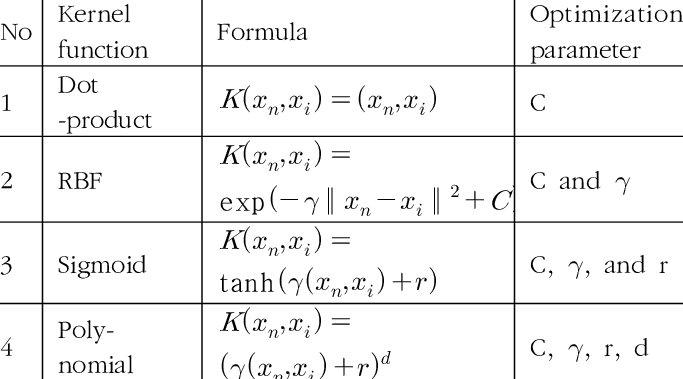

https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b#:~:text=RBF%20is%20the%20default%20kernel,and%20has%20to%20be%20%3E0.


A kernel is a function that takes the original non-linear problem and transforms it into a linear one within the higher-dimensional space.

Rbf (radial basis function): rbf maps the data to an infinite dimension space through the following kernel function to better separate the data. The support vectors locate around the boundary for each class.

Poly (polynomial): ploy maps the data to a higher dimension space of the order of the poly kernel function to better separate the data. The support vectors locate at the edge near the gap between different classes (similar to linear kernel).